# Спецификация к Лабораторной работе №6 

# "Поиск экстремума с двумя условиями. Нисходящая разработка"

# (Вариант 22)

## Абстракция А0
### 1. Постановка задачи.
#### Задание: 
Написать программу обработки одномерного массива в соответствии с условием.

#### Условие: 
Для заданного целочисленного массива $\{A_1, A_2, …, A_n\}$ определить 

номер первого максимального значения среди элементов, 

- меньших A1 и 

- расположенных правее последнего элемента, кратного девяти. 

### 2. Уточненная постановка задачи.
Дан одномерный целочисленный массив A из n элементов.

Обозначим индекс $k: (A_k \in A) \land (A_k \vdots 9) \land \neg (A_i \vdots 9), \forall i > k$. 

Найти $\displaystyle{j: A_j = \max_i \{A_i: A_i < A_1, \forall i > k\} }$.

### 3. Пример с иллюстрацией.

In [3]:
import numpy
import pylab 
%matplotlib inline
pylab.style.use('seaborn-whitegrid')

In [4]:
A1 = numpy.random.randint(-100,100, size=50)
numpy.savetxt('A_Lab6_1.txt', A1, fmt='%5.0f')
A1

array([ 30, -40, -22,  68,  46,  12, -94, -14, -75,  87, -47,  83,  51,
        -9, -30,  19,  21,  -2, -35,  37,  71,  77,  62,  70, -46,  81,
       -65, -85, -79,  49,  82,  92,  53,  13, -48, -80,  26, -32,   3,
       -69,  16, -42,  51, -51, -53,  82,  17, -55,  -7,  30])

In [50]:
# A_Lab6_1.txt, A_Lab6_2.txt, A_Lab6_3.txt, A_Lab6_4.txt, A_Lab6_5.txt
# Aj_Lab6_1.txt, Aj_Lab6_2.txt, Aj_Lab6_3.txt, Aj_Lab6_4.txt, Aj_Lab6_5.txt

print(20*' ' + 'Лаб.6\n' + 90*'=')

fin = str(input('Текстовый файл с элементами массива A: '))
fout = str(input('Текстовый файл с элементами массива A и индексом максимального значения: '))

with open(fin, 'r') as f:
    A = numpy.array([int(x) for x in f.readlines()])
    
print(90*'=' + '\n' + 'Массив A: \n')
print(A)   

k = numpy.max(numpy.where(A % 9 == 0)) + 1
if len(numpy.where(A[k:] < A[0])[0]) == 0:
    print('Нет таких элементов')
else:
    j = numpy.where(A == numpy.max(A[k:][numpy.where(A[k:] < A[0])]))[0][0] + 1

    print(90*'=' + '\n' + 'Индекс максимального значения выбранных элементов массива A:', j)

    with open(fout, 'w') as f:
        for i in range(len(A)):
            f.write("{}\n".format(A[i]))
        f.write("{}".format(j))

                    Лаб.6
Текстовый файл с элементами массива A: A_Lab6_1.txt
Текстовый файл с элементами массива A и индексом максимального значения: Aj_Lab6_1.txt
Массив A: 

[ 30 -40 -22  68  46  12 -94 -14 -75  87 -47  83  51  -9 -30  19  21  -2
 -35  37  71  77  62  70 -46  81 -65 -85 -79  49  82  92  53  13 -48 -80
  26 -32   3 -69  16 -42  51 -51 -53  82  17 -55  -7  30]
Индекс максимального значения выбранных элементов массива A: 37


In [52]:
k, j, A[k:], A[j-1]

(26,
 37,
 array([-65, -85, -79,  49,  82,  92,  53,  13, -48, -80,  26, -32,   3,
        -69,  16, -42,  51, -51, -53,  82,  17, -55,  -7,  30]),
 26)

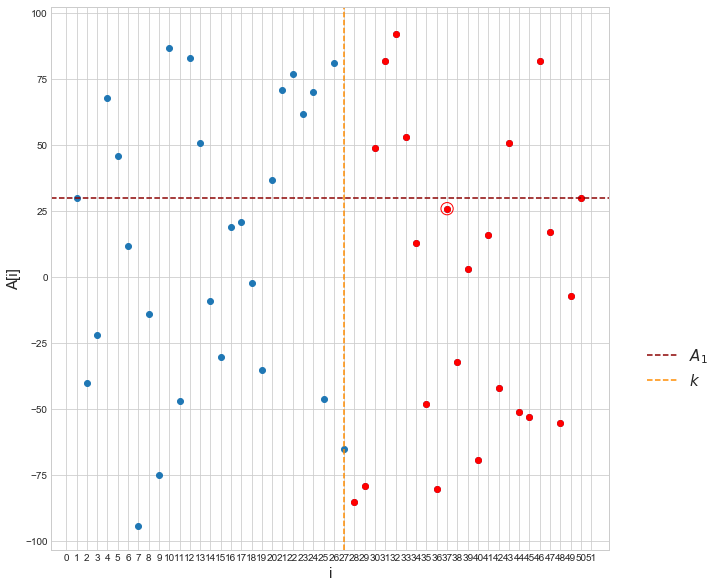

In [53]:
pylab.figure(figsize=(10,10))
pylab.scatter(range(len(A)), A)
pylab.scatter(range(k+1, len(A)), A[k+1:], c='r')
pylab.scatter(j-1, A[j-1], s=150, 
              facecolors='none', edgecolors='r')
pylab.axhline(A[0], c='darkred', ls='--', label=r'$A_1$')
pylab.axvline(k, c='darkorange', ls='--', label=r'$k$')

pylab.xlabel('i', fontsize=15) 
pylab.ylabel('A[i]', fontsize=15)
pylab.xticks(range(-1, len(A)+1), range(len(A)+2));
pylab.legend(fontsize=15, shadow=True, bbox_to_anchor=(1.2,0.4));

### 4. Таблица данных 

| Класс | Имя | Описание (смысл, диапазон, точность) | Тип | Структура | Формат в/в |
| :-: | :-: | :-: | :-: | :-: | :-: |
| входные данные | fin | название текстового файла с элементами массива А | символ | строка | "+X.txt" |
| входные данные | fout | название текстового файла с элементами массива А | символ | строка | "+X.txt" |
| входные данные | A | вводимые из текстового файла числа | цел | одномерный массив | +XX (:5) |
| выходные данные | j | выводимый в текстовый файл индекс максимального значения среди выбранных элементов | цел | простая переменная | XX (:2) |
| промежуточные данные | k | индекс последнего кратного 9 элемента из $A$ | цел | простая переменная | --- |
| промежуточные данные | i | индекс текущего элемента, 1≤i≤50 | цел | простая переменная | --- |

_! в Delphi выход из цикла с 1 до 20 с шагом +1 происходит при значении 21, из цикла с 20 до 1 – при 0_

### 5. Входная форма
- обр 1.1 Текстовый файл с элементами массива A: $<fin>$       
- обр 1.2 Текстовый файл с элементами массива A и индексом максимального значения: $<fout>$
- обр 2.1 Массив A:
- обр 2.2 $ < A[1] > < A[2] >  … < A[n] > $

### 6. Выходная форма

- обр 3 Лаб. 6
- обр 4.1 Текстовый файл с элементами массива A: $<fin>$       
- обр 4.2 Текстовый файл с элементами массива A и индексом максимального значения: $<fout>$
- обр 5.1 Массив A:
- обр 5.2 $ < A[1] > < A[2] > … < A[n] > $

- обр 6 Индекс максимального значения выбранных элементов массива A: $< j >$

### 7. Аномалии

-

### 8. Функциональные тесты

| Исходные данные | - | - |Результаты | Тест |
| :-: | :-: | :-: | :-: | :-: | 
| fin | fout | A | j | № |
| A_Lab6_1.txt | Aj_Lab6_1.txt | `[30 -40 -22  68  46  12 -94 -14 -75  87 -47  83  51  -9 -30  19  21  -2 -35  37  71  77  62  70 -46  81 -65 -85 -79  49  82  92  53  13 -48 -80 26 -32   3 -69  16 -42  51 -51 -53  82  17 -55  -7  30]` | `37` | 1 | 
| - | - | - | - | - |
| A_Lab6_2.txt | Aj_Lab6_2.txt | `[]` | ` ` | 2 |
| - | - | - | - | - |
| A_Lab6_3.txt | Aj_Lab6_3.txt | `[]` | ` ` | 3 |
| - | - | - | - | - |
| A_Lab6_4.txt | Aj_Lab6_4.txt | `[]` | ` ` | 4 |
| - | - | - | - | - |
| A_Lab6_5.txt | Aj_Lab6_5.txt | `[]` | ` ` | 5 |